# $Pk^{\rm{raw}}$

## FFT deltas

In [15]:
import os

path = './deltas/'
d_list = os.listdir(path)

import astropy.io.fits as fits
import pyfftw as fftw
import numpy as np
import astropy.constants as const

z = []
z_q = []
ra = []
dec = []
vel = []

Pk = []
k = []
avg_R = []

Delta_vel = 69.029764

for d in d_list:
    
    delta_set = fits.open(path+d)
    
    for index in np.arange(1,len(delta_set)):  
        
        loglam = delta_set[index].data['LOGLAM']
        lam = 10**(loglam)
        delta = delta_set[index].data['DELTA']
        cont = delta_set[index].data['cont']
        z_qso = delta_set[index].header['Z']
        lrf = lam/(1+z_qso)
        w = delta_set[index].data['WEIGHT']
        z_lya = lam/1215.67-1
        #ra_obj = delta_set[index].header['RA']
        #dec_obj = delta_set[index].header['DEC']
        
        
        #scp = (lrf>1050)&(lrf<1180)
        #lam = lam[scp]
        delta = delta.astype('float')
        
        vel_lya = np.log(lam)*const.c.to('km/s')
        vel_lya = vel_lya-vel_lya[0]
        vel.append(vel_lya)

        z.append(z_lya)
        z_q.append(z_qso)
        #Delta_vel = np.diff(vel_lya)[1].value

        fft = fftw.builders.rfft(delta)
        pk = fft()
        kk = 2*np.pi*np.fft.rfftfreq(len(vel_lya))/Delta_vel
        Pk.append(pk)
        k.append(kk) 
        
z = np.concatenate(z)
vel = np.array(vel)

Pk = np.array(Pk)
k  = np.array(k)

## Redshift distribution of LYA forest pixels

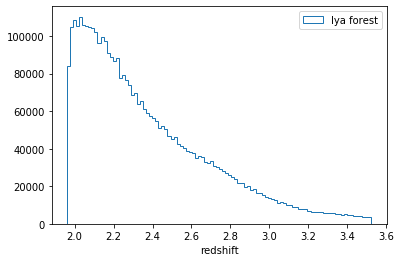

In [16]:
import matplotlib.pyplot as plt
plt.hist(z,bins=100,histtype='step',label='lya forest')
#plt.hist(z_q,bins=100,histtype='step',label='quasars')
plt.xlabel('redshift')
plt.legend()
plt.show()

In [17]:
amp = np.absolute(Pk)**2

from scipy.interpolate import interp1d

k_new = np.linspace(0.01,0.025,25)
Pk_new = []
for kk,pk in zip(k,amp):
    interp = interp1d(kk,pk,kind='nearest')
    pk_new = interp(k_new)
    Pk_new.append(pk_new)

Pk_new = np.array(Pk_new)

avg_Pk = np.mean(Pk_new,axis=0)

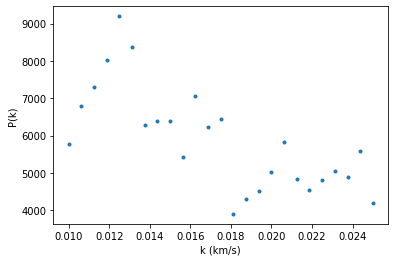

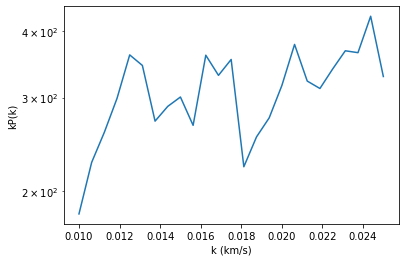

In [18]:
plt.plot(k_new,avg_Pk,'.')
plt.xlabel('k (km/s)')
plt.ylabel('P(k)')
plt.show()

plt.plot(k_new,avg_Pk*k_new*np.pi)
plt.yscale('log')
plt.xlabel('k (km/s)')
plt.ylabel('kP(k)')
plt.show()

# $Pk^{\rm{SB_1}}$

In [19]:
path = './side/'
sb_list = os.listdir(path)

import astropy.io.fits as fits
import pyfftw as fftw
import numpy as np
import astropy.constants as const

z = []
z_q = []
ra = []
dec = []
vel = []

Pk = []
k = []
avg_R = []

Delta_vel = 69.029764

for sb in sb_list:
    
    delta_set = fits.open(path+sb)
    
    for index in np.arange(1,len(delta_set)):  
        
        loglam = delta_set[index].data['LOGLAM']
        lam = 10**(loglam)
        delta = delta_set[index].data['DELTA']
        cont = delta_set[index].data['cont']
        z_qso = delta_set[index].header['Z']
        lrf = lam/(1+z_qso)
        w = delta_set[index].data['WEIGHT']
        z_lya = lam/1215.67-1
        #ra_obj = delta_set[index].header['RA']
        #dec_obj = delta_set[index].header['DEC']
        
        
        #scp = (lrf>1050)&(lrf<1180)
        #lam = lam[scp]
        delta = delta.astype('float')
        
        vel_lya = np.log(lam)*const.c.to('km/s')
        vel_lya = vel_lya-vel_lya[0]
        vel.append(vel_lya)

        z.append(z_lya)
        z_q.append(z_qso)
        #Delta_vel = np.diff(vel_lya)[1].value

        fft = fftw.builders.rfft(delta)
        pk = fft()
        kk = 2*np.pi*np.fft.rfftfreq(len(vel_lya))/Delta_vel
        Pk.append(pk)
        k.append(kk) 
        
z = np.concatenate(z)
vel = np.array(vel)

Pk = np.array(Pk)
k  = np.array(k)

In [20]:
amp = np.absolute(Pk)**2

from scipy.interpolate import interp1d

k_new = np.linspace(0.01,0.025,25)
Pk_new = []
for kk,pk in zip(k,amp):
    interp = interp1d(kk,pk,kind='nearest')
    pk_new = interp(k_new)
    Pk_new.append(pk_new)

Pk_new = np.array(Pk_new)

avg_Pk = np.mean(Pk_new,axis=0)

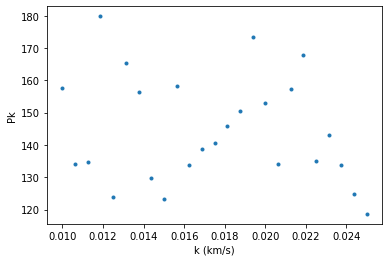

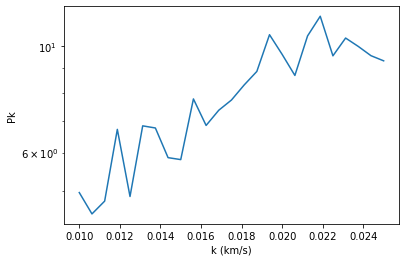

In [21]:
plt.plot(k_new,avg_Pk,'.')
plt.xlabel('k (km/s)')
plt.ylabel('Pk')
plt.show()

plt.plot(k_new,avg_Pk*k_new*np.pi)
plt.xlabel('k (km/s)')
plt.ylabel('Pk')
plt.yscale('log')
plt.show()